In [18]:
from Analysis import *
import pickle
import statistics

In [12]:
October12,October17 = pickle.load(open('observations.p','rb'))

In [13]:
def dispersion(period):
    allTimes = October12.getMJDs()+October17.getMJDs()
    phasedTime = [(24*(time-allTimes[0]) % (period))/period for time in allTimes]
    mags = October12.getAsteroidMags()+October17.getAsteroidMags()
    phasedMags = [x for _,x in sorted(zip(phasedTime,mags))]
    binnedMags = [[n for n in i] for i in np.array_split(np.array(phasedMags),len(phasedTime)/3)]
    variances = []
    for n in binnedMags:
        squares = [(i-np.mean(n))**2 for i in n]
        var = sum(squares)/(len(binnedMags)-1)
        variances.append(var)
    stdv = sum(variances)**(1/2)
    return stdv

In [14]:
def graphMags(period):
    allTimes = October12.getMJDs()+October17.getMJDs()
    phasedTime = [(24*(time-allTimes[0]) % (period))/period for time in allTimes]
    
    print('stdv:',dispersion(period))
    
    plt.scatter(phasedTime[0:20],October12.getAsteroidMags(),label='October 13',color='k',marker='o')
    plt.scatter(phasedTime[19:-1],October17.getAsteroidMags(),label='October 18',color='k',marker='^')        
    
    plt.legend(fontsize=14,frameon=True,loc='best')
    plt.xlim(0,1.0)
    plt.title('Period='+str(period)+' hrs',fontsize=14)
    plt.xlabel('Phase',fontsize=14)
    plt.gca().invert_yaxis()
    plt.ylabel('Photometric Magnitude',fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

stdv: 0.089296856591


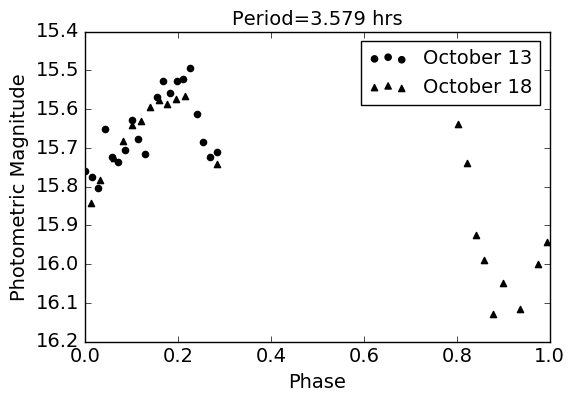

In [15]:
graphMags(3.579)

stdv: 0.0966534374166


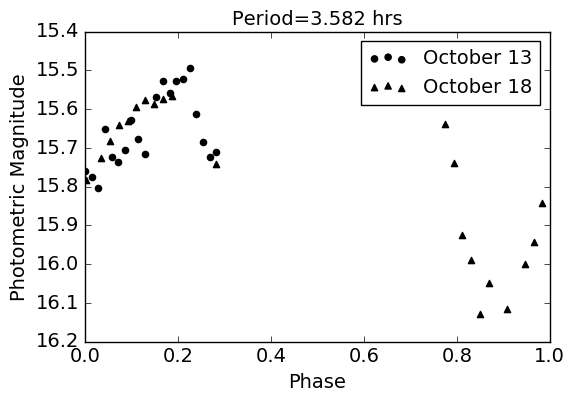

In [16]:
graphMags(3.582)

3.579 and 3.582 hours are values from the literature (https://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2713).

stdv: 0.088125556753


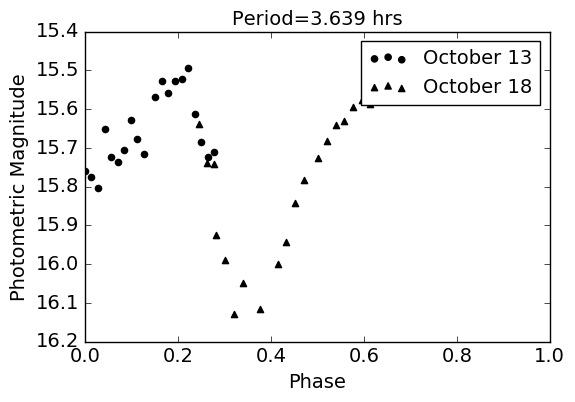

In [17]:
graphMags(3.639)

3.639 seems to be a slightly better fit. The difference turns out not to be statistically significant, though.

In [22]:
minMags = sorted(October12.getAsteroidMags())[:3]
maxMags = sorted(October17.getAsteroidMags())[-3:]
minMag,maxMag = np.mean(minMags),np.mean(maxMags)
s1,s2 = statistics.stdev(minMags),statistics.stdev(maxMags)
amp = maxMag-minMag
print('amplitude:',amp)
amp_error = (s1**2+s2**2)**(1/2)
print('error:',amp_error)
ratio = 10**(0.4*amp)
print()
print('axis ratio:',ratio)
e1,e2 = 10**(0.4*amp-amp_error),10**(0.4*amp+amp_error)
print('error:',abs(e2-e1))

amplitude: 0.583968051175
error: 0.047032426846220166

axis ratio: 1.71232903359
error: 0.371602705378


This is a somewhat arbitrary way to decide what the amplitude of the light curve is. I should probably fit a curve instead. Anyway, this gives you the ratio of the asteroid's longest axis to second-longest axis.